**INFORMATION**

```
Panther's ID:       6314061
Student's Name:     Quang Tuan Le
Professor's Name:   Prof. Ron Zacharski
Semester:           Spring 2023 - CAP4770 
```

**Intro to Data Mining**

**Project #3 - IMAGE CLASSIFICATION**

Description:

The project is going to work a bit more with image classification and the goal is to just have a minor step in complexity from what we have been doing. I want this to be a successful experience rather than one of frustration. You can choose between two datasets.

I choose to work with **The CIFAR-10 dataset**.

The dataset is from Alex Frizhevsky's description of the dataset.

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, VInod Nair, and Geoffrey Hinton.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 per class. There are 50000 training images and 10000 test images.

The dataset is divided into give training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

#### **1) Prepare Dataset to Process**

First, download the zip file ...

In [ ]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz

--2023-03-28 13:53:21--  https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.225.80, 52.217.110.54, 52.216.176.165, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.225.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135107811 (129M) [application/x-tar]
Saving to: ‘cifar10.tgz’

cifar10.tgz         100%[===================>] 128.85M  15.9MB/s    in 9.6s    

2023-03-28 13:53:31 (13.4 MB/s) - ‘cifar10.tgz’ saved [135107811/135107811]



Unzip the file

In [ ]:
!tar -xvzf cifar10.tgz 

Streaming output truncated to the last 5000 lines.
cifar10/test/ship/0489.png
cifar10/test/ship/0295.png
cifar10/test/ship/0430.png
cifar10/test/ship/0973.png
cifar10/test/ship/0438.png
cifar10/test/ship/0794.png
cifar10/test/ship/0634.png
cifar10/test/ship/0783.png
cifar10/test/ship/0012.png
cifar10/test/ship/0933.png
cifar10/test/ship/0195.png
cifar10/test/ship/0781.png
cifar10/test/ship/0189.png
cifar10/test/ship/0891.png
cifar10/test/ship/0255.png
cifar10/test/ship/0798.png
cifar10/test/ship/0487.png
cifar10/test/ship/0019.png
cifar10/test/ship/0078.png
cifar10/test/ship/0623.png
cifar10/test/ship/0100.png
cifar10/test/ship/0826.png
cifar10/test/ship/0163.png
cifar10/test/ship/0755.png
cifar10/test/ship/0303.png
cifar10/test/ship/0302.png
cifar10/test/ship/0706.png
cifar10/test/ship/0940.png
cifar10/test/ship/0607.png
cifar10/test/ship/0048.png
cifar10/test/ship/0676.png
cifar10/test/ship/0363.png
cifar10/test/ship/0175.png
cifar10/test/ship/0091.png
cifar10/test/ship/0625.png
cifa

In [ ]:
!ls

cifar10  cifar10.tgz  sample_data


In [ ]:
ls cifar10 | wc

      2       2      41


After unzipping the file, we have cifar10 folder containing train and test folders with each 10 sub-class folders. So, basically the dataset is already ready to work with.

- train
  - airplane
  - automobile
  - bird 
  - cat 
  - deer 
  - dog 
  - frog 
  - horse 
  - ship 
  - truck
- test
  - ... (same structure)

#### **2) Import Necessary Libraries**

In [ ]:
## Define the directories 
import os, shutil 

# The class allows to quickly set up Python generators that can automatically turn image files 
# on disk into batches of pre-processed tensors.
from keras.preprocessing.image import ImageDataGenerator

# Using Keras models with layers of Conv2d, Dense, Flatten, ...
from keras import models
from keras import layers 

# Using Keras optimizers
from keras import optimizers

#### **3) The CIFAR-10 dataset**

##### Step 1: Populate the directories

In [ ]:
## Define the directories
import os, shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'cifar10'

# Directories for our training, 
# validation and testing 
train_dir = os.path.join(original_dataset_dir, 'train')
test_dir = os.path.join(original_dataset_dir, 'test')

##### Step 2: Data preprocessing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
# Split training data into training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# Re-arrange training and validation dataset by using subset parameters
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        subset='training'
)

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


Alright, after using validation_split at train_data, I get 40000 images belonging to 10 classes of training set and 10000 images belonging to 10 classes of validation set.

##### Step 3: Create and compile a fully connected model

1. Create and compile model

In [ ]:
## Implementing in Keras, building the architecture

from keras import models
from keras import layers

# Define a sequential container - the layers we add are organized sequentially
model = models.Sequential()

# Add Convolutional Neural Network & Pooling2D 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten 
model.add(layers.Flatten())

# Using Dense (fully connected) layer with hidden size = 64
model.add(layers.Dense(64, activation='relu'))
# Add another layer to our model with output size = 10, represent one of the possible labels for the image (0 through 9)
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

2. Compile the network using the following parameters

With 3 parameters:
- An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
- A loss function: this is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
- Metrics to monitor during training and testing. We need an accuracy.

In [ ]:
import tensorflow as tf
from keras import optimizers

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

3. Fit the model

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size
)

Epoch 1/10
1250/1250 [==============================] - 22s 15ms/step - loss: 1.6124 - accuracy: 0.4141 - val_loss: 1.3975 - val_accuracy: 0.5093
Epoch 2/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.2049 - accuracy: 0.5733 - val_loss: 1.0556 - val_accuracy: 0.6301
Epoch 3/10
1250/1250 [==============================] - 17s 14ms/step - loss: 1.0180 - accuracy: 0.6440 - val_loss: 0.9606 - val_accuracy: 0.6696
Epoch 4/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8921 - accuracy: 0.6885 - val_loss: 0.9352 - val_accuracy: 0.6743
Epoch 5/10
1250/1250 [==============================] - 18s 14ms/step - loss: 0.7956 - accuracy: 0.7261 - val_loss: 0.8968 - val_accuracy: 0.6911
Epoch 6/10
1250/1250 [==============================] - 17s 14ms/step - loss: 0.7168 - accuracy: 0.7505 - val_loss: 0.9397 - val_accuracy: 0.6883
Epoch 7/10
1250/1250 [==============================] - 18s 14ms/step - loss: 0.6440 - accuracy: 0.7752 - val_loss: 0.9236 -

4. Accuracy on Test Data

In [ ]:
# evaluate and print the accuracy
scoreSeg = model.evaluate(test_generator)
print("Accuracy: ", scoreSeg[1])

313/313 [==============================] - 4s 11ms/step - loss: 0.9823 - accuracy: 0.7167
Accuracy:  0.71670001745224


###### 71% accuracy but the model is quite overfitting

5. Graph The Loss and Accuracy

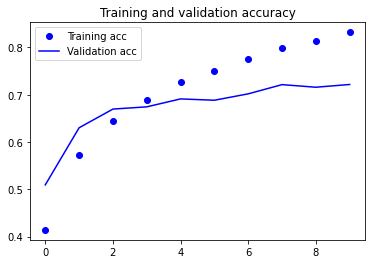

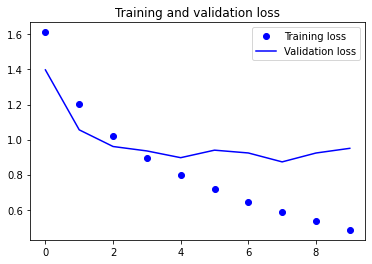

In [ ]:
# From CNNs Dogs and cats lab, I have the following code to draw the graph
# in order to assess whether the overfitting is too much or not.

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As I see, this graph is quite overfitting from the 4th epoch. So, I will follow the technique using in CNNs dog and cat lab to reduce the overfitting.

#### **4) Reducing Overfitting Process**

One technique to reduce overfitting is try to use data augmentation that I learn from CNNs dogs and cats lab.
In Keras, it supports this technique by adding hyperparameters to ImageDataGenerator on training dataset.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

new_train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      validation_split=0.2
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Re-arrange training and validation dataset by using subset parameters
new_train_generator = new_train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        subset='training'
)

new_validation_generator = new_train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
)

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [ ]:
from keras import layers
from keras import models

new_model = models.Sequential()

## TO DO
new_model.add (layers. Conv2D (32, (3, 3), activation='relu', input_shape= (32, 32, 3))) 
new_model.add(layers. MaxPooling2D ((2, 2))) 
new_model.add(layers. Conv2D (64, (3, 3), activation='relu')) 
new_model.add(layers. MaxPooling2D( (2, 2))) 
new_model.add(layers. Conv2D (128, (3, 3), activation='relu'))
new_model.add(layers. MaxPooling2D( (2, 2))) 

new_model.add(layers.Flatten())

# add between Flatten and Dense
new_model.add(layers.Dropout(0.5))

new_model.add(layers.Dense(64, activation='relu'))
new_model.add(layers.Dense(10, activation='softmax'))
#new_model.add(layers.Dense(10))

new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
new_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
new_history = new_model.fit(
      new_train_generator,
      steps_per_epoch=new_train_generator.samples/new_train_generator.batch_size ,
      epochs=30,
      validation_data=new_validation_generator,
      validation_steps=new_validation_generator.samples/new_validation_generator.batch_size
)

Epoch 1/30
1250/1250 [==============================] - 46s 35ms/step - loss: 1.9345 - accuracy: 0.2785 - val_loss: 1.7485 - val_accuracy: 0.3683
Epoch 2/30
1250/1250 [==============================] - 44s 35ms/step - loss: 1.7092 - accuracy: 0.3737 - val_loss: 1.5560 - val_accuracy: 0.4398
Epoch 3/30
1250/1250 [==============================] - 44s 35ms/step - loss: 1.6034 - accuracy: 0.4238 - val_loss: 1.4772 - val_accuracy: 0.4779
Epoch 4/30
1250/1250 [==============================] - 44s 35ms/step - loss: 1.5360 - accuracy: 0.4498 - val_loss: 1.4370 - val_accuracy: 0.4922
Epoch 5/30
1250/1250 [==============================] - 44s 36ms/step - loss: 1.5016 - accuracy: 0.4630 - val_loss: 1.4532 - val_accuracy: 0.4746
Epoch 6/30
1250/1250 [==============================] - 46s 37ms/step - loss: 1.4698 - accuracy: 0.4791 - val_loss: 1.4098 - val_accuracy: 0.5016
Epoch 7/30
1250/1250 [==============================] - 47s 38ms/step - loss: 1.4424 - accuracy: 0.4884 - val_loss: 1.3740 -

In [ ]:
new_scoreSeg = new_model.evaluate(test_generator)
print("Accuracy: ", new_scoreSeg[1])

313/313 [==============================] - 3s 11ms/step - loss: 1.1440 - accuracy: 0.6220
Accuracy:  0.621999979019165


##### Improving overfitting but I'm only at 62% accuracy.

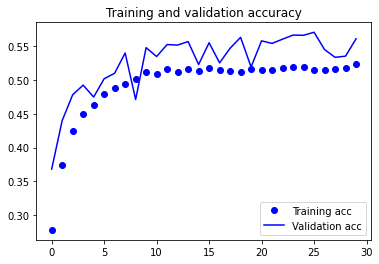

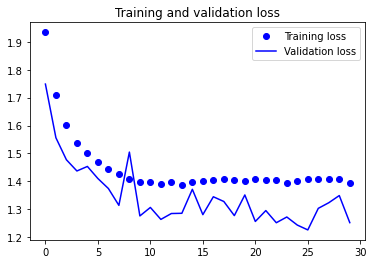

In [ ]:
import matplotlib.pyplot as plt

acc = new_history.history['accuracy']
val_acc = new_history.history['val_accuracy']
loss = new_history.history['loss']
val_loss = new_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Even though the overfitting is reduced, this technique that I used above may change too much the data set. That's why the classification is not really good, and the accuracy is decreased.

So I will modify the ImageDataGenerator on Training dataset again! Just want to find the best thing I could do to improve both overfitting and accuracy.

#### **5) New Combination**

I think because the above hyperparameters are too exacerbate the training dataset, so it leads to the result reducing the accuracy. Therefore, I decide to just modify a bit on hyperparameters and try again. 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

update_train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,      # Random rotate in range from -20 to +20 degree
      width_shift_range=0.1,  # Random shift image by width from -10% to +10%
      height_shift_range=0.1, # Random shift image by height from -10% to +10%
      shear_range=0.2,        # Random shear image from -20 to +20 degree
      zoom_range=0.2,         # Zoom in or out in range from 80% to 120%
      horizontal_flip=True,   # Random flip by horizontal
      fill_mode='nearest',    
      validation_split=0.2
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Re-arrange training and validation dataset by using subset parameters
update_train_generator = update_train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        subset='training'
)

update_validation_generator = update_train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
)

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [ ]:
from keras import layers
from keras import models

update_model = models.Sequential()

## TO DO
update_model.add (layers. Conv2D (32, (3, 3), activation='relu', input_shape= (32, 32, 3))) 
update_model.add(layers. MaxPooling2D ((2, 2))) 
update_model.add(layers. Conv2D (64, (3, 3), activation='relu')) 
update_model.add(layers. MaxPooling2D( (2, 2))) 
update_model.add(layers. Conv2D (128, (3, 3), activation='relu'))
update_model.add(layers. MaxPooling2D( (2, 2))) 

update_model.add(layers.Flatten())

# add between Flatten and Dense
update_model.add(layers.Dropout(0.5))

update_model.add(layers.Dense(64, activation='relu'))
update_model.add(layers.Dense(10, activation='softmax'))
#new_model.add(layers.Dense(10))

update_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
update_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
update_history = update_model.fit(
      update_train_generator,
      steps_per_epoch=update_train_generator.samples/update_train_generator.batch_size ,
      epochs=30,
      validation_data=update_validation_generator,
      validation_steps=update_validation_generator.samples/update_validation_generator.batch_size
)

Epoch 1/30
1250/1250 [==============================] - 45s 35ms/step - loss: 1.8183 - accuracy: 0.3270 - val_loss: 1.5570 - val_accuracy: 0.4228
Epoch 2/30
1250/1250 [==============================] - 44s 35ms/step - loss: 1.5333 - accuracy: 0.4428 - val_loss: 1.4139 - val_accuracy: 0.4855
Epoch 3/30
1250/1250 [==============================] - 44s 35ms/step - loss: 1.4117 - accuracy: 0.4934 - val_loss: 1.3565 - val_accuracy: 0.5164
Epoch 4/30
1250/1250 [==============================] - 43s 35ms/step - loss: 1.3552 - accuracy: 0.5184 - val_loss: 1.2258 - val_accuracy: 0.5559
Epoch 5/30
1250/1250 [==============================] - 44s 35ms/step - loss: 1.3008 - accuracy: 0.5396 - val_loss: 1.1732 - val_accuracy: 0.5870
Epoch 6/30
1250/1250 [==============================] - 43s 35ms/step - loss: 1.2616 - accuracy: 0.5551 - val_loss: 1.1644 - val_accuracy: 0.5938
Epoch 7/30
1250/1250 [==============================] - 43s 35ms/step - loss: 1.2417 - accuracy: 0.5635 - val_loss: 1.1434 -

In [ ]:
update_scoreSeg = update_model.evaluate(test_generator)
print("Accuracy: ", update_scoreSeg[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.9151 - accuracy: 0.6903
Accuracy:  0.6902999877929688


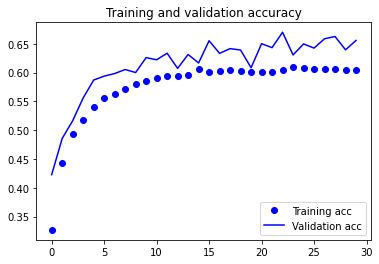

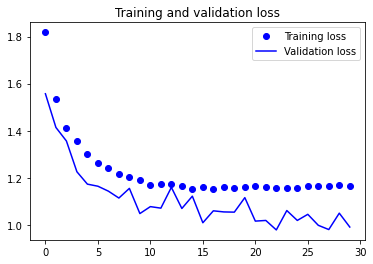

In [ ]:
import matplotlib.pyplot as plt

acc = update_history.history['accuracy']
val_acc = update_history.history['val_accuracy']
loss = update_history.history['loss']
val_loss = update_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### I'm at 69% (improving both accuracy & overfitting)

#### **6) Try my last!**

Still the same with the above steps! But I will re-run training and validation data generator and then fit with the same model to see if they can gain the accuracy score.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

last_train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,      # Random rotate in range from -20 to +20 degree
      width_shift_range=0.1,  # Random Shift image by width from -10% to +10%
      height_shift_range=0.1, # Random shift image by height from -10% to +10%
      shear_range=0.2,        # Random shear from -20 to +20 degree
      zoom_range=0.2,         # Random zoom in/out from 80% to 120%
      horizontal_flip=True,   # Random flip by horizontal
      fill_mode='nearest',    
      validation_split=0.2
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Re-arrange training and validation dataset by using subset parameters
last_train_generator = last_train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        subset='training'
)

last_validation_generator = last_train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
)

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [ ]:
from keras import layers
from keras import models

last_model = models.Sequential()

## TO DO
last_model.add (layers. Conv2D (32, (3, 3), activation='relu', input_shape= (32, 32, 3))) 
last_model.add(layers. MaxPooling2D ((2, 2))) 
last_model.add(layers. Conv2D (64, (3, 3), activation='relu')) 
last_model.add(layers. MaxPooling2D( (2, 2))) 
last_model.add(layers. Conv2D (128, (3, 3), activation='relu'))
last_model.add(layers. MaxPooling2D( (2, 2))) 

last_model.add(layers.Flatten())

# add between Flatten and Dense
last_model.add(layers.Dropout(0.5))

last_model.add(layers.Dense(64, activation='relu'))
last_model.add(layers.Dense(10, activation='softmax'))

last_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 2, 2, 128)       

In [ ]:
last_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
last_history = last_model.fit(
      last_train_generator,
      steps_per_epoch=last_train_generator.samples/last_train_generator.batch_size ,
      epochs=30,
      validation_data=last_validation_generator,
      validation_steps=last_validation_generator.samples/last_validation_generator.batch_size
)

Epoch 1/30
1250/1250 [==============================] - 45s 35ms/step - loss: 1.8349 - accuracy: 0.3199 - val_loss: 1.5574 - val_accuracy: 0.4325
Epoch 2/30
1250/1250 [==============================] - 44s 35ms/step - loss: 1.5433 - accuracy: 0.4385 - val_loss: 1.4124 - val_accuracy: 0.4984
Epoch 3/30
1250/1250 [==============================] - 43s 35ms/step - loss: 1.4258 - accuracy: 0.4915 - val_loss: 1.3132 - val_accuracy: 0.5279
Epoch 4/30
1250/1250 [==============================] - 44s 35ms/step - loss: 1.3484 - accuracy: 0.5187 - val_loss: 1.2524 - val_accuracy: 0.5584
Epoch 5/30
1250/1250 [==============================] - 43s 35ms/step - loss: 1.3002 - accuracy: 0.5370 - val_loss: 1.1762 - val_accuracy: 0.5835
Epoch 6/30
1250/1250 [==============================] - 44s 35ms/step - loss: 1.2631 - accuracy: 0.5563 - val_loss: 1.1527 - val_accuracy: 0.6015
Epoch 7/30
1250/1250 [==============================] - 44s 35ms/step - loss: 1.2358 - accuracy: 0.5668 - val_loss: 1.1749 -

After 22 minutes

In [ ]:
last_scoreSeg = last_model.evaluate(test_generator)
print("Accuracy: ", last_scoreSeg[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.8340 - accuracy: 0.7187
Accuracy:  0.7186999917030334


##### Now I got my best accuracy ~72%

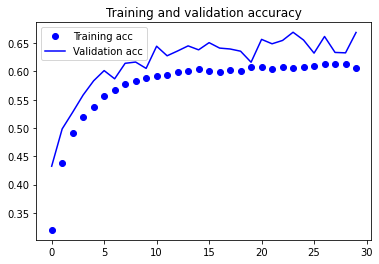

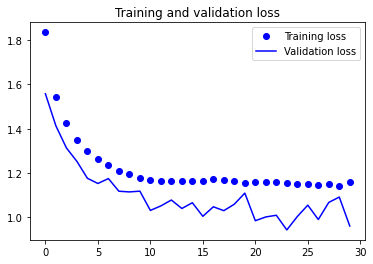

In [ ]:
import matplotlib.pyplot as plt

acc = last_history.history['accuracy']
val_acc = last_history.history['val_accuracy']
loss = last_history.history['loss']
val_loss = last_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### **7) Summary**

To finish this project, I choose to work on The CIFAR-10 dataset. I apply what I learned from 2  previous labs (A first look at deep learning and CNNs Dogs and Cats). And as professor hint about this dataset is a slight remix of work with MNIST and clothing, so I follow through the process as my "Table of contents".

I download CIFAR-10 dataset, unzip, populate them in directories, use ImageDataGenerator and split training folders into 2 subsets "training" and "validation", and apply to "testing" folder also. 

Then, I use Keras models to create a Sequential of layers (Convolutional Neural Networks, Max Pooling 2D, Dense Matrix with hidden input, and 10 output.)

I also try to reduce overfitting after the first try by using hyperparameters on ImageDataGenerators, and using different epochs.

My best accuracy I got in this project is approximate 72%.